In [13]:
import chainer
import chainer.functions as F
import chainer.links as L

class MyModel(chainer.Chain):
    
    def __init__(self, n_out):
        w = chainer.initializers.HeNormal()
        super(MyModel, self).__init__(
            conv1=L.Convolution2D(None, 32, 3, 3, 1, initialW=w),
            conv2=L.Convolution2D(32, 64, 3, 3, 1, initialW=w),
            conv3=L.Convolution2D(64, 128, 3, 3, 1, initialW=w),
            fc4=L.Linear(None, 1000),
            fc5=L.Linear(1000, n_out)
        )
        train = True
        
    def __call__(self, x):
        h = F.relu(self.conv1(x))
        h = F.relu(self.conv2(h))
        h = F.relu(self.conv3(h))
        h = F.relu(self.fc4(h))
        h = self.fc5(h)
        return h

In [15]:
from chainer.datasets import cifar
from chainer import iterators
from chainer import training
from chainer import optimizers
from chainer.training import extensions

batchsize = 64
gpu_id = 0
max_epoch = 30

# Model
model = MyModel(10)
model = L.Classifier(model)
model.to_gpu(gpu_id)

# Optimizer
optimizer = optimizers.Adam()
optimizer.setup(model)

# Dataset
train, test = cifar.get_cifar10()

# Iterator
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, False, False)

# Updater
updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)

# Trainer
trainer = training.Trainer(updater, max_epoch)
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(
    ['epoch', 'iteration', 'main/loss', 'main/accuracy', 'elapsed_time']))
trainer.run()

epoch       iteration   main/loss   main/accuracy  elapsed_time
1           782         1.52654     0.444913       5.06998       
2           1563        1.22865     0.556998       9.60512       
3           2344        1.07832     0.613876       13.9301       
4           3125        0.946845    0.662212       18.2524       
5           3907        0.823599    0.7079         22.7768       
6           4688        0.702101    0.75016        27.1811       
7           5469        0.581983    0.791793       31.612        
8           6250        0.463027    0.838428       35.9966       
9           7032        0.349658    0.877078       40.4519       
10          7813        0.270859    0.90615        44.9542       
11          8594        0.205517    0.929057       49.2675       
12          9375        0.170201    0.941641       53.6698       
13          10157       0.139611    0.953245       58.0438       
14          10938       0.133209    0.953785       62.4179       
15          

KeyboardInterrupt: 

frog


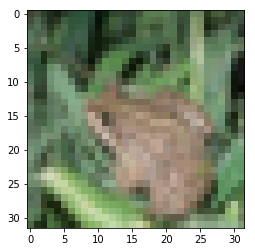

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

cls_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']

x, t = test[4]
plt.imshow(x.transpose(1, 2, 0))
print(cls_names[t])